## Mobility of a sedimenting lattice as a function of volume fraction

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import solvePeriodic
import periodic_1_4 as me
from math import *
PI = 3.14159265359

In [2]:
#Parameters
Np=1
b, eta, dim = 1.0, 1.0/6, 3
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

# Memory allocation
v = np.zeros(dim*Np)      
o = np.zeros(dim*Np)  
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)
T = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

S = np.zeros(Np*5)
D = np.zeros(Np*3)

mu=1.0/(6*np.pi*eta*b)

[ 5.92745841e-12  5.92745841e-12 -2.62583739e-01]
[-9.19091718e-11 -9.19091718e-11 -1.58530770e-01]
[-3.14977546e-10 -3.14977546e-10 -1.13495259e-01]
[-9.03871102e-10 -9.03871102e-10 -7.53083674e-02]
[-2.45013381e-09 -2.45013381e-09 -4.59194035e-02]
[-1.33959760e-08 -1.33959760e-08 -1.96841161e-02]


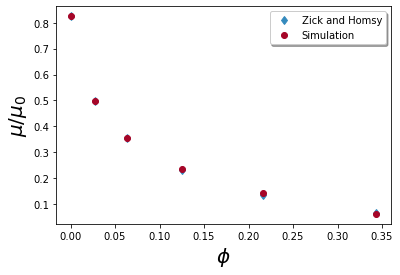

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.825		 0.825	
0.027		  0.498		 0.498	
0.064		  0.357		 0.356	
0.125		  0.237		 0.233	
0.216		  0.144		 0.134	
0.343		  0.062		 0.065	


In [3]:
# Deafult value of xi = sqrt(pi)/L

S = np.zeros(Np*5)
D = np.zeros(Np*3)


for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    F[2] = -1  ## gravity                           
    
    Rbm = solvePeriodic.Rbm(b, eta, L[i])#, xi=0.88*sqrt(pi)/L[i])   
    Rbm.krylovSolve(v, o, F, T, S, D)
    print(v)
    
    phi[i] = (4*np.pi*b**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00   
    

exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')

plt.xlabel(r'$\phi$', fontsize=20); plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True); plt.show()

print ('volume fraction   simulation\t Zick & Homsy (1982)')
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

In [4]:
vv/exR

array([ 0.93540322,  0.71709872,  0.53879522,  0.29398805, -0.01733163,
       -0.15624334])

In [5]:
erfc(10)

2.088487583762545e-45

In [5]:
## why are there x and y velocities? FH creates equal x and y component for some reason. Symmetries not right? 
## If we implement the full system, have to try and get 2s & 3s modes via multiplication with Delta2 and Delta3, respectively. 

G1s1s only (superposition approximation) compared to pystokes: GR only - do not quite match!

velocity G1s1s sympy:

[ 0.          0.         -0.22003413]
[ 0.          0.         -0.09600102]
[ 0.          0.         -0.10650287]
[ 0.          0.         -0.18952312]
[ 0.          0.         -0.36319139]
[ 0.          0.         -0.64563726]

velocity pystokes:

[ 0.          0.         -0.21995675]
[ 0.          0.         -0.09391184]
[ 0.          0.         -0.10155074]
[ 0.          0.         -0.17985099]
[ 0.          0.         -0.34647795]
[ 0.          0.         -0.61909694]

G1s1s only (superposition approximation) compared to pystokes: GF only - match exactly

velocity G1s1s sympy

[ 5.93051636e-12  5.93051636e-12 -2.45642178e-01]
[-8.07738035e-11 -8.07738035e-11 -1.13673287e-01]
[-2.22691316e-10 -2.22691316e-10 -6.10553690e-02]
[-4.63174181e-10 -4.63174181e-10 -2.18039777e-02]
[-8.26863737e-10 -8.26863737e-10  7.39254901e-04]
[-1.33840132e-09 -1.33840132e-09  3.23269708e-03]

velocity pystokes:

[ 5.93051637e-12  5.93051636e-12 -2.45642178e-01]
[-8.07738035e-11 -8.07738035e-11 -1.13673287e-01]
[-2.22691316e-10 -2.22691316e-10 -6.10553690e-02]
[-4.63174181e-10 -4.63174181e-10 -2.18039777e-02]
[-8.26863738e-10 -8.26863737e-10  7.39254901e-04]
[-1.33840132e-09 -1.33840132e-09  3.23269708e-03]

Real space Green's function gives quite large errors, even for G1s1sF -- anything dodgy in the computation? 

Had lattice positions -L,-L,-L and L,L,L excluded -- does including them give better results? Not much better

Why does G = GF + GR give disproportionally bad results? Is computation of K = factor * G correct, or are we only using one of GF or GR? 

Try with G1s1s alone, should be superposition approximation...

________________

Superposition approx (pystokes) vs G1s1s:

GF alone matches exactly (had a sign error before)

GR does not quite match: What is causing this? Do I have to go to full matrices? Should not have an effect on G1s1s (= 3x3 matrix)

Is double-layer computed from sum GF+GR or just from GR? 


Why is GR + GF not simply sum of velocities of GR and GF alone? 